<a href="https://colab.research.google.com/github/tasheera/CVD_Risk_Analyser/blob/MachineLearning/Copy_of_CardioVascularDieseaseRiskAssesssmentModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular disease risk assessment**

# **Load dataset**

In [17]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cvd_data = pd.read_csv('health_data.csv', index_col = 'id')

cvd_data


,age,gender,height,weight,bmi,bmi_status,systolic_BP,diastolic_BP,cholesterol,glucose,smoking,alcohol,active,cardio
id,,,,,,,,,,,,,,
0,50,1,168,62.0,21.97,2,110,80,0,0,0,0,1,0
1,55,0,156,85.0,34.93,4,140,90,2,0,0,0,1,1
2,52,0,165,64.0,23.51,2,130,70,2,0,0,0,0,1
3,48,1,169,82.0,28.71,3,150,100,0,0,0,0,1,1
4,48,0,156,56.0,23.01,2,100,60,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,53,1,168,76.0,26.93,3,120,80,0,0,1,0,1,0
99995,62,0,158,126.0,50.47,4,140,90,1,1,0,0,1,1
99996,52,1,183,105.0,31.35,4,180,90,2,0,0,1,0,1


In [18]:
cvd_data.describe()

,age,gender,height,weight,bmi,bmi_status,systolic_BP,diastolic_BP,cholesterol,glucose,smoking,alcohol,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,0.349571,164.359229,74.205690,27.556583,2.894786,128.817286,96.630414,0.366871,0.226457,0.088129,0.053771,0.803729,0.499700
std,6.765294,0.476838,8.210126,14.395757,6.091419,0.804068,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,0.000000,55.000000,10.000000,3.470000,1.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,159.000000,65.000000,23.880000,2.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,0.000000,165.000000,72.000000,26.375000,3.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,1.000000,170.000000,82.000000,30.220000,4.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,1.000000,250.000000,200.000000,298.670000,4.000000,16020.000000,11000.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


#**Data Preprocessing**



In [19]:
cvd_data.isnull().sum()


age             0
gender          0
height          0
weight          0
bmi             0
bmi_status      0
systolic_BP     0
diastolic_BP    0
cholesterol     0
glucose         0
smoking         0
alcohol         0
active          0
cardio          0
dtype: int64

**Histogram and bell curve**

In [20]:
import numpy as np
bins_value = int(np.sqrt(len(cvd_data)))
from scipy.stats import norm

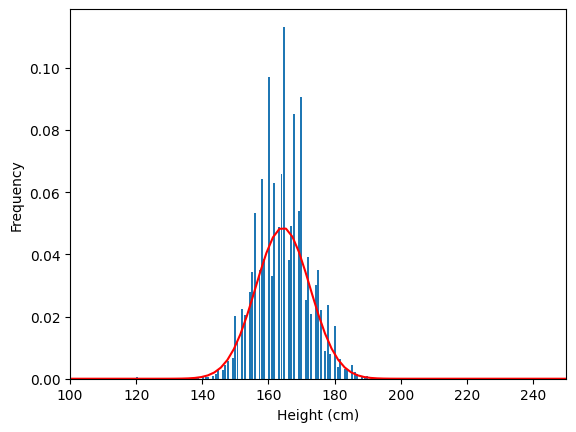

In [21]:
plt.hist(cvd_data.height, bins = bins_value, rwidth = 0.8,density=True)
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.xlim(100,250)

x_range = np.linspace(cvd_data.height.min(), cvd_data.height.max(), 100)
plt.plot(x_range, norm.pdf(x_range, cvd_data.height.mean(), cvd_data.height.std()), label='Normal Distribution', color='red')

plt.show()

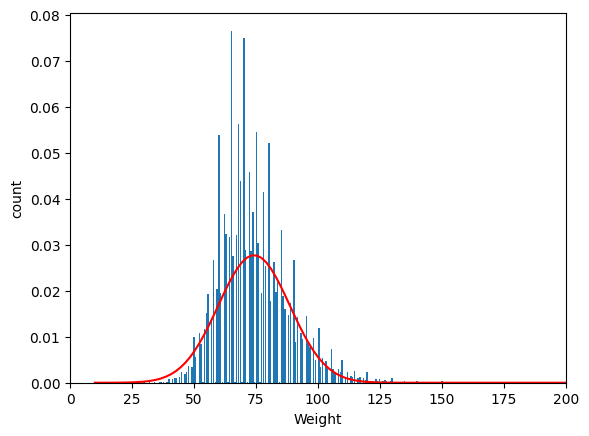

In [22]:
plt.hist(cvd_data.weight, bins = bins_value, rwidth = 0.8, density=True)
plt.xlabel('Weight')
plt.ylabel('count')
plt.xlim(0,200)

x_range = np.linspace(cvd_data.weight.min(), cvd_data.weight.max(), 100)
plt.plot(x_range, norm.pdf(x_range, cvd_data.weight.mean(), cvd_data.weight.std()), label='Normal Distribution', color='red')

plt.show()

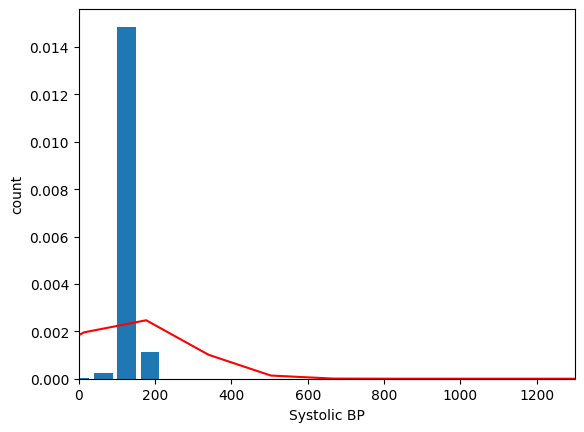

In [23]:
plt.hist(cvd_data.systolic_BP, bins = bins_value, rwidth = 0.8, density=True)
plt.xlabel('Systolic BP')
plt.ylabel('count')
plt.xlim(0,1300)

x_range = np.linspace(cvd_data.systolic_BP.min(), cvd_data.systolic_BP.max(), 100)
plt.plot(x_range, norm.pdf(x_range, cvd_data.systolic_BP.mean(), cvd_data.systolic_BP.std()), label='Normal Distribution', color='red')

plt.show()

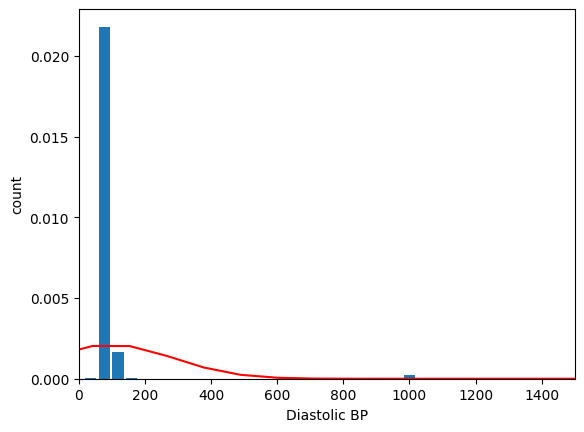

In [24]:
plt.hist(cvd_data.diastolic_BP, bins = bins_value, rwidth = 0.8, density=True)
plt.xlabel('Diastolic BP')
plt.ylabel('count')
plt.xlim(0,1500)

x_range = np.linspace(cvd_data.diastolic_BP.min(), cvd_data.diastolic_BP.max(), 100)
plt.plot(x_range, norm.pdf(x_range, cvd_data.diastolic_BP.mean(), cvd_data.diastolic_BP.std()), label='Normal Distribution', color='red')

plt.show()

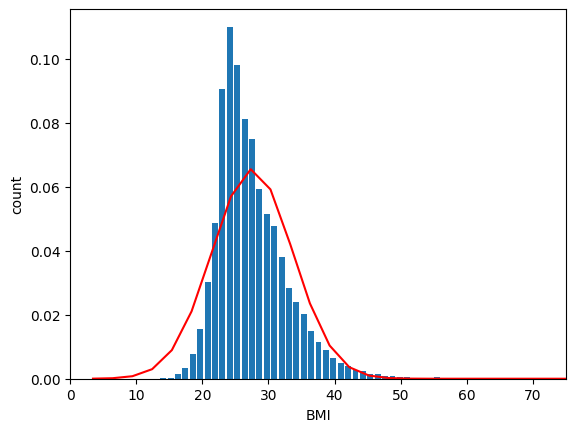

In [25]:
plt.hist(cvd_data.bmi, bins = bins_value, rwidth = 0.8, density=True)
plt.xlabel('BMI')
plt.ylabel('count')
plt.xlim(0,75)

x_range = np.linspace(cvd_data.bmi.min(), cvd_data.bmi.max(), 100)
plt.plot(x_range, norm.pdf(x_range, cvd_data.bmi.mean(), cvd_data.bmi.std()), label='Normal Distribution', color='red')

plt.show()

# **Data preperation**

## Data seperation as X and Y

In [26]:
x = cvd_data[["age",	"gender",	"height",	"weight",	"bmi","bmi_status",	"systolic_BP",	"diastolic_BP",	"cholesterol"	,"glucose", "smoking"	,"alcohol",	"active"]]
x

,age,gender,height,weight,bmi,bmi_status,systolic_BP,diastolic_BP,cholesterol,glucose,smoking,alcohol,active
id,,,,,,,,,,,,,
0,50,1,168,62.0,21.97,2,110,80,0,0,0,0,1
1,55,0,156,85.0,34.93,4,140,90,2,0,0,0,1
2,52,0,165,64.0,23.51,2,130,70,2,0,0,0,0
3,48,1,169,82.0,28.71,3,150,100,0,0,0,0,1
4,48,0,156,56.0,23.01,2,100,60,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,53,1,168,76.0,26.93,3,120,80,0,0,1,0,1
99995,62,0,158,126.0,50.47,4,140,90,1,1,0,0,1
99996,52,1,183,105.0,31.35,4,180,90,2,0,0,1,0


In [27]:
y = cvd_data['cardio']
y

id
0        0
1        1
2        1
3        1
4        0
        ..
99993    0
99995    1
99996    1
99998    1
99999    0
Name: cardio, Length: 70000, dtype: int64

## Data splitting into testing and training

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [29]:
x_train

,age,gender,height,weight,bmi,bmi_status,systolic_BP,diastolic_BP,cholesterol,glucose,smoking,alcohol,active
id,,,,,,,,,,,,,
46315,60,0,155,75.0,31.22,4,130,90,0,0,0,0,1
83871,54,0,156,59.0,24.24,2,150,1100,0,0,0,0,1
82755,48,1,169,66.0,23.11,2,110,70,0,0,1,0,1
8469,53,0,168,79.0,27.99,3,130,80,0,0,0,0,1
39180,60,0,163,63.0,23.71,2,120,80,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20362,61,1,170,68.0,23.53,2,130,80,0,0,0,0,1
90493,61,1,170,70.0,24.22,2,120,80,1,0,1,1,1
93652,53,0,165,65.0,23.88,2,120,79,0,0,0,0,0


In [30]:
x_test

,age,gender,height,weight,bmi,bmi_status,systolic_BP,diastolic_BP,cholesterol,glucose,smoking,alcohol,active
id,,,,,,,,,,,,,
83255,52,1,176,85.0,27.44,3,140,90,0,0,0,0,1
9154,56,0,165,65.0,23.88,2,120,80,0,0,0,0,1
33347,46,1,178,76.0,23.99,2,110,80,1,0,0,0,1
22225,49,0,170,110.0,38.06,4,120,80,0,0,0,1,1
96185,63,1,176,65.0,20.98,2,120,80,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71296,62,0,155,61.0,25.39,3,140,80,0,0,0,0,1
71523,53,1,172,71.0,24.00,2,110,80,1,1,0,1,1
37905,62,0,161,62.0,23.92,2,150,90,0,0,0,0,1


In [31]:
# Extract the features
features = ["age",	"gender",	"bmi_status",	"systolic_BP",	"diastolic_BP"]

# Initialize the scaler
scaler = StandardScaler()

x_train[features] = scaler.fit_transform(x_train[features])
x_test[features] = scaler.transform(x_test[features])

In [32]:
# Removing outliers
z_scores = (x_train[features] - x_train[features].mean()) / x_train[features].std()
threshold = 3
outlier_indices = np.where((np.abs(z_scores) > threshold).any(axis=1))[0]

# Drop only valid indices
valid_indices = np.intersect1d(outlier_indices, x_train.index)
x_train_no_outliers = x_train.drop(index=valid_indices)
y_train_no_outliers = y_train.drop(index=valid_indices)

# **Model building**

## **Random Forest**

**Model Training**

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state = 100)
rf.fit(x_train_no_outliers, y_train_no_outliers)


RandomForestClassifier(random_state=100)

**Applying model for predicting**

In [34]:
y_rf_train_prediction = rf.predict(x_train)
y_rf_test_prediction = rf.predict(x_test)


In [35]:
y_rf_train_prediction

array([1, 1, 0, ..., 0, 0, 0])

In [36]:
y_rf_test_prediction

array([1, 0, 0, ..., 1, 0, 1])

**Evaluate**

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train,y_rf_train_prediction)
rf_train_r2 = r2_score(y_train,y_rf_train_prediction)

rf_test_mse = mean_squared_error(y_test,y_rf_test_prediction)
rf_test_r2 = r2_score(y_test,y_rf_test_prediction)


print('RF MSE TRAIN : ',rf_train_mse)
print('RF R2 TRAIN : ',rf_train_r2)
print('RF MSE Test : ',rf_test_mse)
print('RF R2 Test : ',rf_test_r2)


RF MSE TRAIN :  0.026875
RF R2 TRAIN :  0.8924996292334151
RF MSE Test :  0.2897142857142857
RF R2 Test :  -0.15887987109298218


In [38]:
from sklearn import metrics
#42 - 71.3
#100 - 71.3
#0 - 71.1
#2022 - 71.18
print("Random Forest model accuracy(in %):", metrics.accuracy_score(y_test, y_rf_test_prediction)*100)

Random Forest model accuracy(in %): 71.02857142857142


## Logistic Regression

**Training the model**

In [39]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train_no_outliers, y_train_no_outliers)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
x_test

,age,gender,height,weight,bmi,bmi_status,systolic_BP,diastolic_BP,cholesterol,glucose,smoking,alcohol,active
id,,,,,,,,,,,,,
83255,-0.197204,1.367329,176,85.0,27.44,0.132767,0.076356,-0.036785,0,0,0,0,1
9154,0.393480,-0.731353,165,65.0,23.88,-1.111156,-0.058665,-0.092467,0,0,0,0,1
33347,-1.083229,1.367329,178,76.0,23.99,-1.111156,-0.126175,-0.092467,1,0,0,0,1
22225,-0.640217,-0.731353,170,110.0,38.06,1.376689,-0.058665,-0.092467,0,0,0,1,1
96185,1.427176,1.367329,176,65.0,20.98,-1.111156,-0.058665,-0.092467,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71296,1.279505,-0.731353,155,61.0,25.39,0.132767,0.076356,-0.092467,0,0,0,0,1
71523,-0.049533,1.367329,172,71.0,24.00,-1.111156,-0.126175,-0.092467,1,1,0,1,1
37905,1.279505,-0.731353,161,62.0,23.92,-1.111156,0.143866,-0.036785,0,0,0,0,1


**Applying model for predicting**

In [41]:
y_log_reg_train_prediction = log_reg.predict(x_train)
y_log_reg_test_prediction = log_reg.predict(x_test)
y_log_reg_test_prediction


array([1, 0, 0, ..., 1, 0, 1])

**Evaluate**

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

log_reg_train_mse = mean_squared_error(y_train,y_log_reg_train_prediction)
log_reg_train_r2 = r2_score(y_train,y_log_reg_train_prediction)

log_reg_test_mse = mean_squared_error(y_test,y_log_reg_test_prediction)
log_reg_test_r2 = r2_score(y_test,y_log_reg_test_prediction)


print('log_reg MSE TRAIN : ',log_reg_train_mse)
print('log_reg R2 TRAIN : ',log_reg_train_r2)
print('log_reg MSE Test : ',log_reg_test_mse)
print('log_reg R2 Test : ',log_reg_test_r2)

log_reg MSE TRAIN :  0.28583928571428574
log_reg R2 TRAIN :  -0.1433610862861956
log_reg MSE Test :  0.29078571428571426
log_reg R2 Test :  -0.16316566943282318


In [43]:
from sklearn import metrics
#42 - 69.8
#100 - 70.5
#0 - 69.6
#2022 - 69.4
print("Logistic regression model accuracy(in %):", metrics.accuracy_score(y_test, y_log_reg_test_prediction)*100)


Logistic regression model accuracy(in %): 70.92142857142856


In [44]:
cm = metrics.confusion_matrix(y_test,y_log_reg_test_prediction)
print(cm)

[[5179 1790]
 [2281 4750]]


##Decision Tree

**Training the model**

In [45]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(max_depth= 15, random_state=100)
tree.fit(x_train_no_outliers, y_train_no_outliers)

DecisionTreeClassifier(max_depth=15, random_state=100)

In [46]:
x_test

,age,gender,height,weight,bmi,bmi_status,systolic_BP,diastolic_BP,cholesterol,glucose,smoking,alcohol,active
id,,,,,,,,,,,,,
83255,-0.197204,1.367329,176,85.0,27.44,0.132767,0.076356,-0.036785,0,0,0,0,1
9154,0.393480,-0.731353,165,65.0,23.88,-1.111156,-0.058665,-0.092467,0,0,0,0,1
33347,-1.083229,1.367329,178,76.0,23.99,-1.111156,-0.126175,-0.092467,1,0,0,0,1
22225,-0.640217,-0.731353,170,110.0,38.06,1.376689,-0.058665,-0.092467,0,0,0,1,1
96185,1.427176,1.367329,176,65.0,20.98,-1.111156,-0.058665,-0.092467,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71296,1.279505,-0.731353,155,61.0,25.39,0.132767,0.076356,-0.092467,0,0,0,0,1
71523,-0.049533,1.367329,172,71.0,24.00,-1.111156,-0.126175,-0.092467,1,1,0,1,1
37905,1.279505,-0.731353,161,62.0,23.92,-1.111156,0.143866,-0.036785,0,0,0,0,1


**Applying model for predicting**

In [47]:
y_tree_train_prediction = tree.predict(x_train)
y_tree_test_prediction = tree.predict(x_test)
y_tree_test_prediction

array([1, 0, 0, ..., 1, 0, 0])

**Evaluation**

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

tree_train_mse = mean_squared_error(y_train,y_tree_train_prediction)
tree_train_r2 = r2_score(y_train,y_tree_train_prediction)

tree_test_mse = mean_squared_error(y_test,y_tree_test_prediction)
tree_test_r2 = r2_score(y_test,y_tree_test_prediction)

# r2 = 1
# mse = 0
print('tree MSE TRAIN : ',tree_train_mse)
print('tree R2 TRAIN : ',tree_train_r2)
print('tree MSE Test : ',tree_test_mse)
print('tree R2 Test : ',tree_test_r2)

tree MSE TRAIN :  0.201375
tree R2 TRAIN :  0.19449722183735696
tree MSE Test :  0.2950714285714286
tree R2 Test :  -0.18030886279218672


In [49]:
from sklearn import metrics
#42 - 71.2
#100 - 70.4
#0 - 70.9
#2022 - 69.9
print("Decision tree model accuracy(in %):", metrics.accuracy_score(y_test, y_tree_test_prediction)*100)

Decision tree model accuracy(in %): 70.49285714285715


##Naive Bayes

**Training the model**

In [50]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_no_outliers, y_train_no_outliers)

GaussianNB()

**Applying model for predicting**

In [51]:
y_gnb_train_prediction = gnb.predict(x_train)
y_gnb_test_prediction = gnb.predict(x_test)
y_gnb_test_prediction

array([0, 0, 0, ..., 0, 0, 1])

**Evaluation**

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

gnb_train_mse = mean_squared_error(y_train,y_gnb_train_prediction)
gnb_train_r2 = r2_score(y_train,y_gnb_train_prediction)

gnb_test_mse = mean_squared_error(y_test,y_gnb_test_prediction)
gnb_test_r2 = r2_score(y_test,y_gnb_test_prediction)

# r2 = 1
# mse = 0
print('gnb MSE TRAIN : ',gnb_train_mse)
print('gnb R2 TRAIN : ',gnb_train_r2)
print('gnb MSE Test : ',gnb_test_mse)
print('gnb R2 Test : ',gnb_test_r2)

gnb MSE TRAIN :  0.3966607142857143
gnb R2 TRAIN :  -0.5866483294605649
gnb MSE Test :  0.40614285714285714
gnb R2 Test :  -0.624603290689028


In [53]:
from sklearn import metrics
#42 - 59.4
#100 - 58.0
#0 - 58.85
#2022 - 59.25
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_gnb_test_prediction)*100)

Gaussian Naive Bayes model accuracy(in %): 59.385714285714286


# **Tabulate results**

In [54]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Testing MSE', 'Testing R2']

log_reg_results = pd.DataFrame(['Logistic Regression', log_reg_train_mse, log_reg_train_r2, log_reg_test_mse, log_reg_test_r2]).transpose()
log_reg_results.columns = ['Method', 'Training MSE', 'Training R2', 'Testing MSE', 'Testing R2']

tree_results = pd.DataFrame(['Decision tree', tree_train_mse, tree_train_r2, tree_test_mse, tree_test_r2]).transpose()
tree_results.columns = ['Method', 'Training MSE', 'Training R2', 'Testing MSE', 'Testing R2']


cvd_data_models = pd.concat([rf_results,  log_reg_results, tree_results], axis=0 ).reset_index(drop=True)
cvd_data_models


,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Random Forest,0.026875,0.8925,0.289714,-0.15888
1,Logistic Regression,0.285839,-0.143361,0.290786,-0.163166
2,Decision tree,0.201375,0.194497,0.295071,-0.180309


# Data visualisation